# Biochemistry 570 Midterm Exam

Tyson Wheelwright

#### Question 1

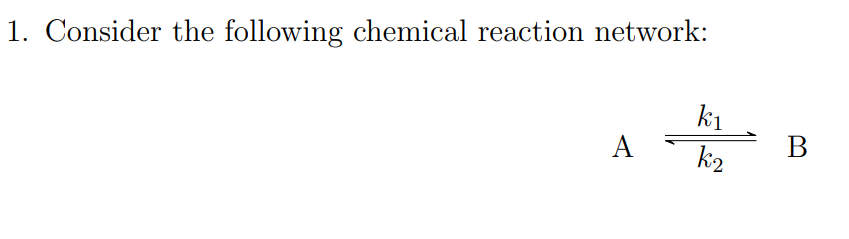

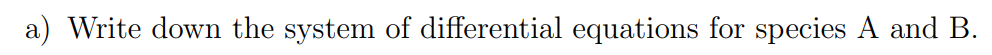

dadt = k2 * B - k1 * A  
dbdt = k1 * A - k2 * B  

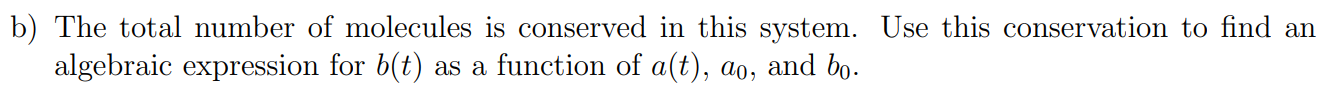

b(t) = A0 + B0 - a(t)

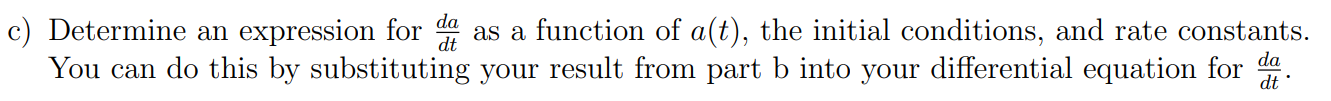

da(t)/dt = k2 * b(t) - k1 * a(t)  
da(t)/dt = k2 * (A0 + B0 - a(t)) - k1 * a(t)  
da(t)/dt = k2 * (A0 + B0) - (k1 + k2) * a(t)  
  
you can substitute A0 + B0 for T (which is the total concentration), then you get this:  
da(t)/dt = k2 * b(t) - k1 * a(t)  
da(t)/dt = k2 * (T - a(t)) - k1 * a(t)  
da(t)/dt = k2 * T - (k1 + k2) * a(t)  

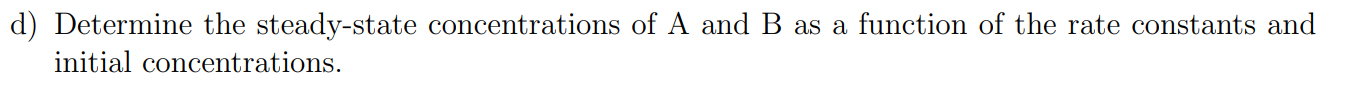

solving for a at steady state (ass)  
set it equal to 0  
0 = k2 * T - (k1 + k2) * ass  
subtract second term  
(k1 + k2) * ass = k2 * T  
divide by k1 + k2  
ass = (k2 * T) / (k1 + k2)  
you can substitue the initial conditions back in for t  
ass = (k2 *(a0 + b0)) / (k1 + k2)  
  
solving for b at steady state (bss)  
we know  
bss = Keq * ass   
also    
Keq = k1 / k2    
so   
bss = (k1 / k2) * ass  
we know what ass is, so we substitute that in  
bss = (k1 * T) / (k1 + k2)   
we can put the initial concentrations back in for T  
bss = (k1 * (a0 + b0)) / (k1 + k2)  
this makes sense that it's so similar to ass becuase it's a symmetric rxn   

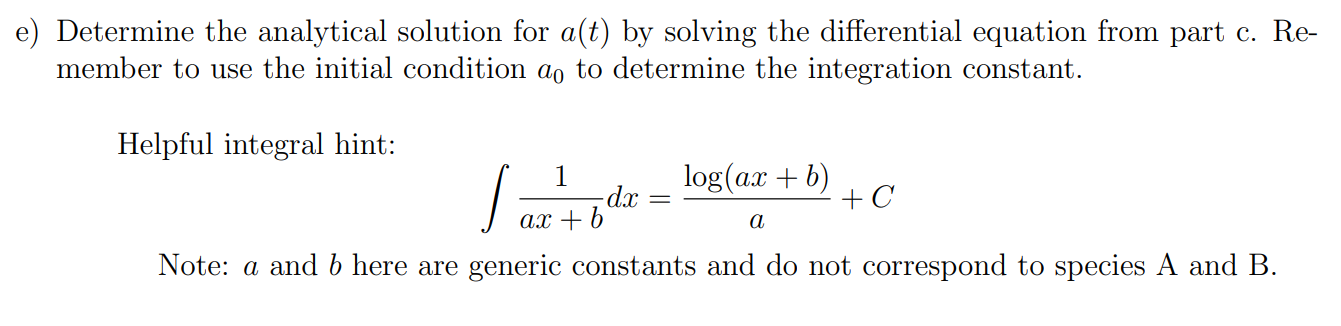

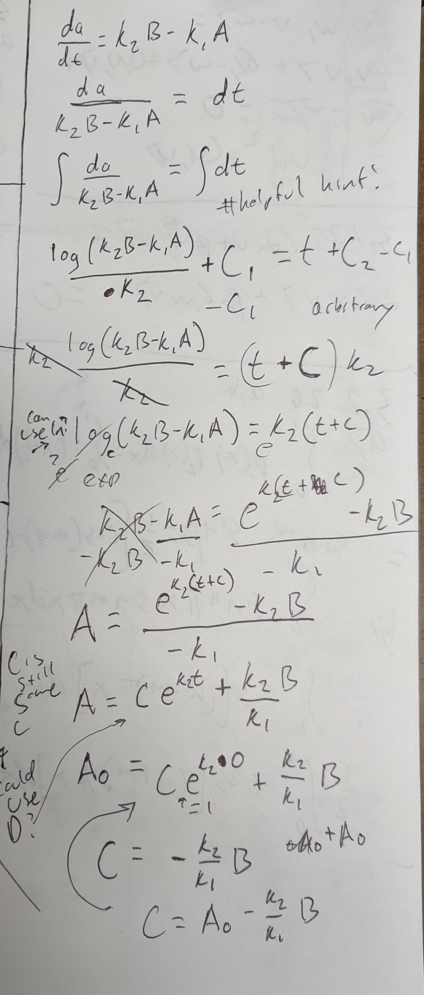

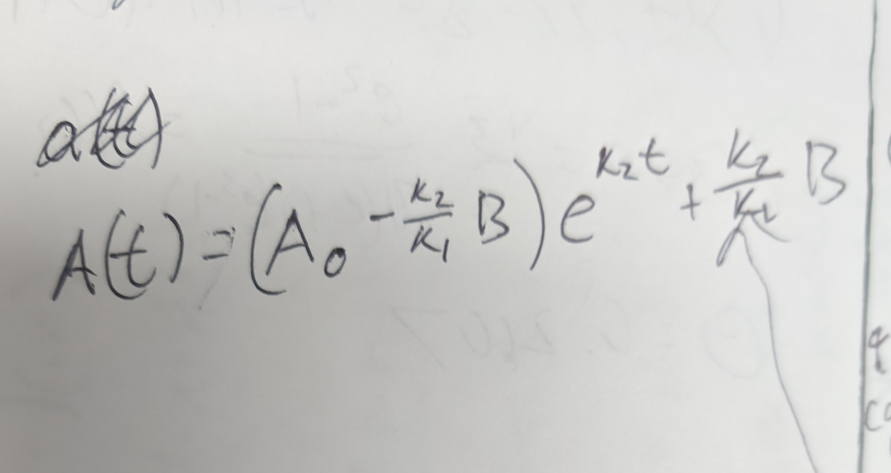

#### Question 2

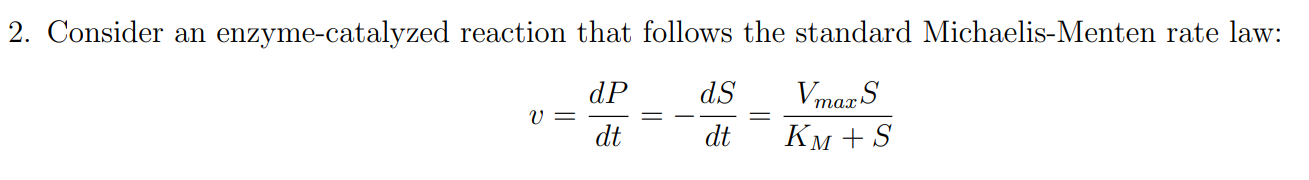

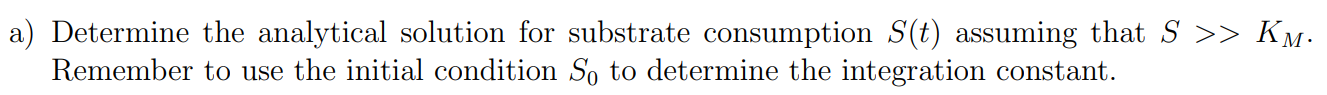

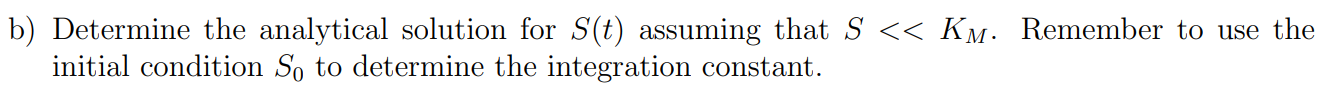

#### Question 3

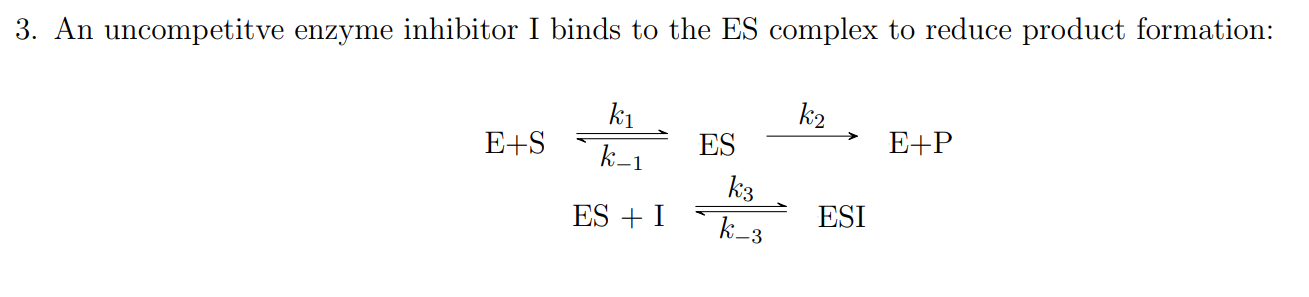

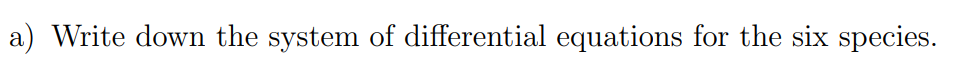

dedt = - k1 * e * s + kn1 * es + k2 * e * p  
dsdt = -k1 * e * s + kn1 * es  
desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
dpdt = k2 * es  
dIdt = - k3 * es * I + kn3 * esi  
desidt = - kn3 * esi + k3 * es * I  

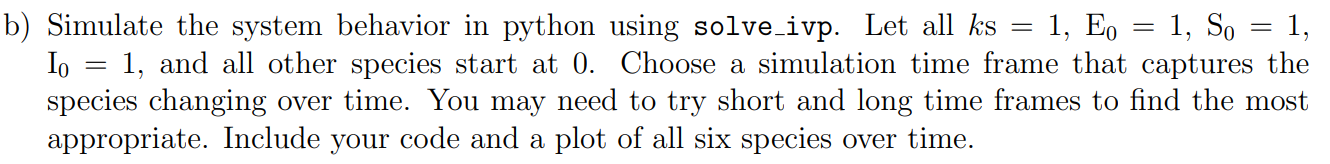

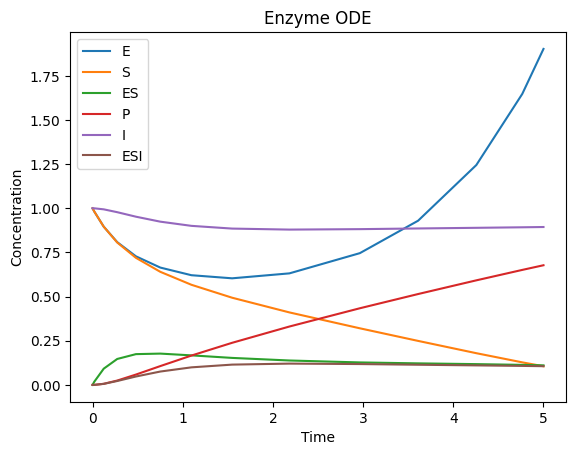

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


def enzyme_ODE(t, y):
    #takes in the species

    e,s,es,p,I,esi = y # unpack y

    # parameters
    k1 = 1
    kn1 = 1
    k2 = 1 
    k3 = 1 
    kn3 = 1

    # differential equations
    dedt = - k1 * e * s + kn1 * es + k2 * e * p  
    dsdt = -k1 * e * s + kn1 * es  
    desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
    dpdt = k2 * es  
    dIdt = - k3 * es * I + kn3 * esi  
    desidt = - kn3 * esi + k3 * es * I  

    #outputs the deriviates for each of the species
    dydt = [dedt, dsdt, desdt, dpdt, dIdt, desidt] # repack dydt
    # the Y var needs to be the same size as the dydt!

    return dydt

# the time interval of the simulation
tspan = [0,5]

# set initial conditions
y = [1,1,0,0,1,0] # 'E', 'S', 'ES', 'P', 'I', 'ESI'

# integrate the ODE
sol = solve_ivp(enzyme_ODE, tspan, y)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['E', 'S', 'ES', 'P', 'I', 'ESI'])
plt.title('Enzyme ODE')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

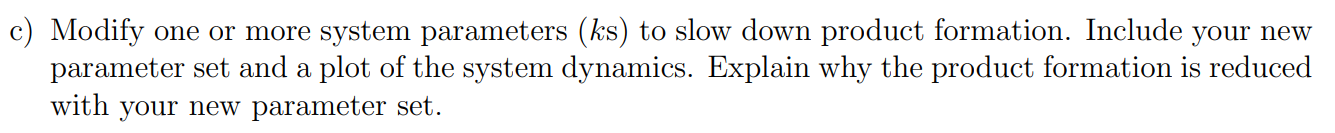

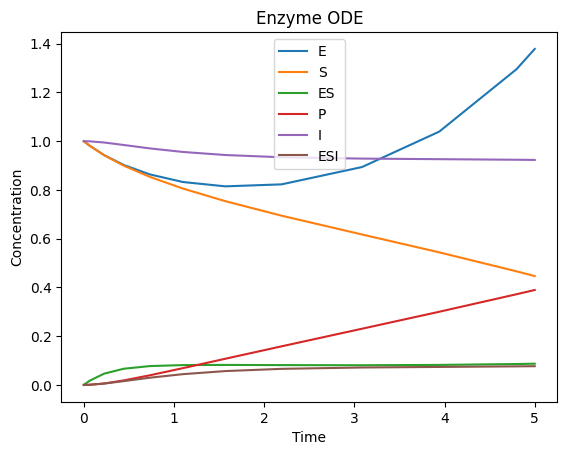

In [9]:
def enzyme_ODE(t, y):
    #takes in the species

    e,s,es,p,I,esi = y # unpack y

    # parameters
    '''MODIFIED k1'''
    k1 = 0.3 #used to be 1
    kn1 = 1
    k2 = 1 
    k3 = 1 
    kn3 = 1

    # differential equations
    dedt = - k1 * e * s + kn1 * es + k2 * e * p  
    dsdt = -k1 * e * s + kn1 * es  
    desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
    dpdt = k2 * es  
    dIdt = - k3 * es * I + kn3 * esi  
    desidt = - kn3 * esi + k3 * es * I  

    #outputs the deriviates for each of the species
    dydt = [dedt, dsdt, desdt, dpdt, dIdt, desidt] # repack dydt
    # the Y var needs to be the same size as the dydt!

    return dydt

# the time interval of the simulation
tspan = [0,5]

# set initial conditions
y = [1,1,0,0,1,0] # 'E', 'S', 'ES', 'P', 'I', 'ESI'

# integrate the ODE
sol = solve_ivp(enzyme_ODE, tspan, y)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['E', 'S', 'ES', 'P', 'I', 'ESI'])
plt.title('Enzyme ODE')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

Why is it reduced?  
The rate at which the product is produced depends on the rate (k1) of the formation of the enzyme substrate complex (ES).  
I lowered this rate, which means that the concentration of the enzyme substrate complex (ES) will be lowered.  
A lower amount of ES means that the rate that EP is formed is also lowered.  

#### Question 4

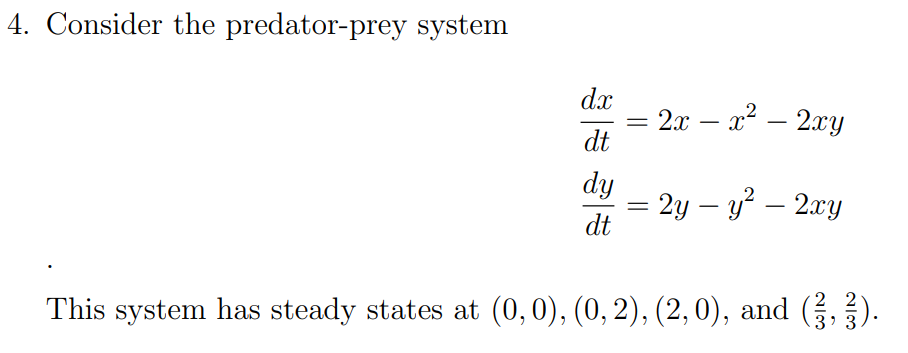

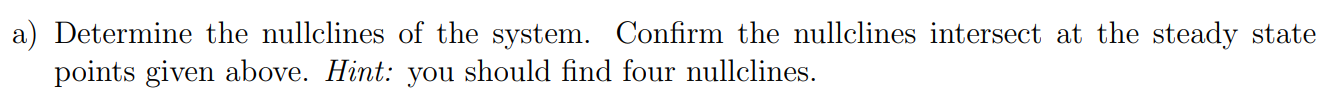

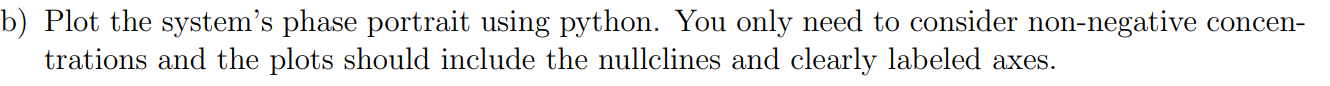

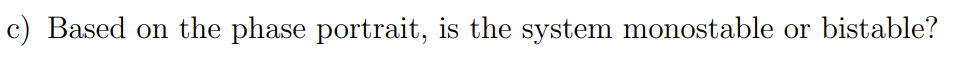